# Instructions for running on Imperial HPC from Python

Log into a login node on HPC or onto the HPC JupyterHub (https://jupyter.rcs.imperial.ac.uk/) and open a terminal window.  The instructions below are printed out from my command history.

## Create an anaconda environment

```
bash-4.4$ module load anaconda/personal
bash-4.4$ conda create --name bayesian python=3.8
bash-4.4$ source activate bayesian
(bayesian) bash-4.4$ conda env update --file environment.yml --prune
```

## Download the code
```
(bayesian) bash-4.4$ git clone https://github.com/Cefhalic/BayesianClusters.git Bayesian
(bayesian) bash-4.4$ cd Bayesian/
(bayesian) bash-4.4$ git checkout PythonBindings
```

## Compile the code
```
(bayesian) bash-4.4$ cd Bayesian/
(bayesian) bash-4.4$ make clean
(bayesian) bash-4.4$ make
```

## Test the code.  

Note that this will not produce any graphical output unless there is an X-Windows or another graphical interface.

```
(bayesian) bash-4.4$ python ./python/test.py --cfg config.txt -i /rds/general/project/easystorm/live/bayesian/1_un_red.csv --r 20nm --t 40nm
``` 

## Running the test as a Jupyter notebook

While in a JupyterHub session first set up the conda `bayesian` environment to make the current conda environment available as `bayesian` within Jupyter (the modules should already be included with the environment.yml file above).

```
(bayesian) bash-4.4$ python -m ipykernel install --user --name bayesian --display-name "bayesian"
```

From the `python` subdirectory of the main `Bayesian` source code directory open the `test.ipynb` Jupyter notebook.

Enjoy!

In [33]:
from BayesianClustering import *
from sys import argv
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [37]:
def Callback( clusters , background  ):
    print( "Displaying")

    X , Y = [] , []
    for point in background:
        X.append( point.x )
        Y.append( point.y )

    x, y, colours = [], [], []
    for colour, cluster in enumerate( clusters ) :
        for point in cluster:
            x.append( point.x )
            y.append( point.y )
            colours.append( colour )

    plt.scatter( X, Y, s=0.1 , marker='.' , c="black" )
    plt.scatter( x, y, s=0.1 , marker='.' , c=colours , cmap="prism" )
    plt.show()

In [35]:
Configuration.FromVector( ['--cfg', '../config.txt', '-i', 
                           '/rds/general/project/easystorm/live/bayesian/1_un_red.csv',
                           '--r', '20nm', '--t', '40nm'])

Alpha: 20
Centre: x=9.75e-05, y=9.09e-05
Pb: 0.2
Zoom: 2e-05
Input file: /rds/general/project/easystorm/live/bayesian/1_un_red.csv
R-bins: 35 bins from 0 to 2e-07 in steps of 5.71429e-09
T-bins: 35 bins from 0 to 5e-07 in steps of 1.42857e-08
Sigma-integral: 5e-09 to 1e-07 in 100 steps


Reading File
Displaying
Read 665253 points
  Completed in 5.827 seconds
Populating neighbourhood
  Completed in 8.805 seconds
Clusterize
  Completed in 2.174 seconds


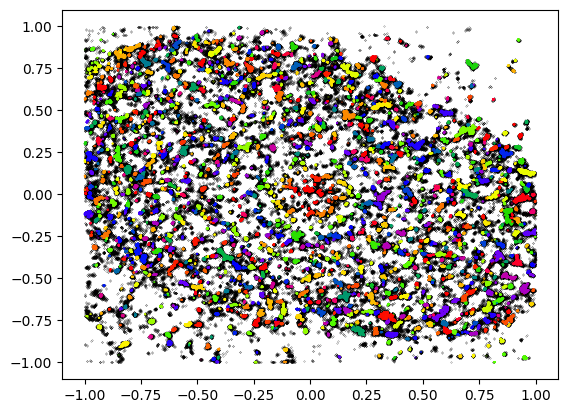

In [38]:
OneStopGetClusters( Callback )

In [5]:
import numpy as np

def Callback2( clusters , background  ):
    print( "Displaying")
    pts = [ len( cluster ) for cluster in clusters ]
    plt.boxplot( pts , labels= ["$Dataset A$"] , widths= 0.8 , showfliers=False , showmeans=True , meanprops=dict(color="grey"), meanline=True, medianprops=dict(color="black") )
    plt.scatter( np.random.normal( 1 , 0.05 , len( pts ) ) , pts , color="r" , alpha=0.5 , s=1 )
    plt.xlabel('x-label')
    plt.ylabel('Cluster size')
    plt.yscale( "log" )
    plt.show()

Alpha: 20
Centre: x=9.75e-05, y=9.09e-05
Pb: 0.2
Displaying
Zoom: 2e-05
Input file: /rds/general/project/easystorm/live/bayesian/1_un_red.csv
R-bins: 35 bins from 0 to 2e-07 in steps of 5.71429e-09
T-bins: 35 bins from 0 to 5e-07 in steps of 1.42857e-08
Sigma-integral: 5e-09 to 1e-07 in 100 steps
Reading File
Read 665253 points
  Completed in 6.48 seconds
Populating neighbourhood
  Completed in 9.881 seconds
Clusterize
  Completed in 2.285 seconds


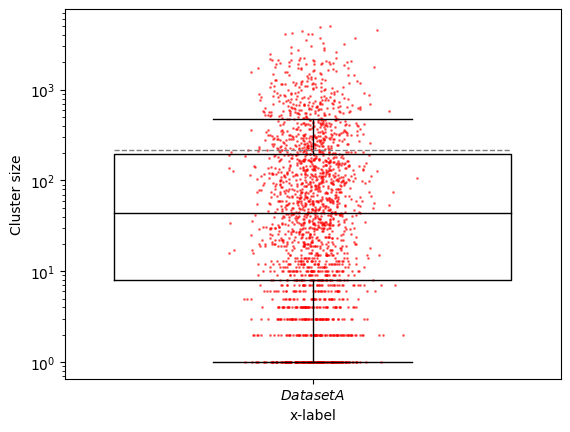

In [13]:
Configuration.FromVector( ['--cfg', '../config.txt', '-i', 
                           '/rds/general/project/easystorm/live/bayesian/1_un_red.csv',
                           '--r', '20nm', '--t', '40nm'] )
OneStopGetClusters( Callback2 )

In [7]:
def Callback3( clusters , background  ):
    print( "Displaying")
    pts = [ len( cluster ) for cluster in clusters ]
    plt.xlabel('Cluster size')	
    plt.ylabel('Count')
    plt.hist( pts , 100, facecolor='green', alpha=0.75)
    plt.show()


Alpha: 20
Centre: x=9.75e-05, y=9.09e-05
Pb: 0.2
Displaying
Zoom: 2e-05
Input file: /rds/general/project/easystorm/live/bayesian/1_un_red.csv
R-bins: 35 bins from 0 to 2e-07 in steps of 5.71429e-09
T-bins: 35 bins from 0 to 5e-07 in steps of 1.42857e-08
Sigma-integral: 5e-09 to 1e-07 in 100 steps
Reading File
Read 665253 points
  Completed in 5.053 seconds
Populating neighbourhood
  Completed in 11.994 seconds
Clusterize
  Completed in 2.385 seconds


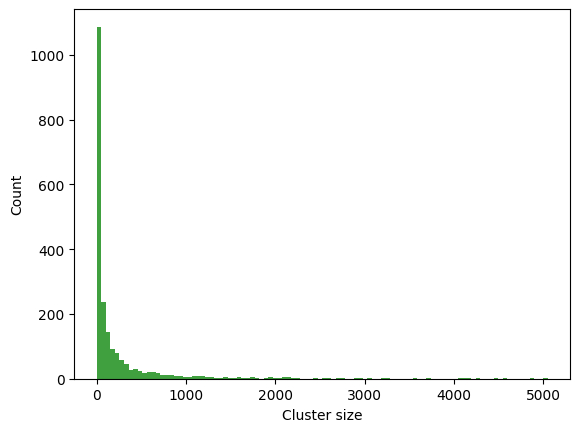

In [14]:
Configuration.FromVector( ['--cfg', '../config.txt', '-i', 
                           '/rds/general/project/easystorm/live/bayesian/1_un_red.csv',
                           '--r', '20nm', '--t', '40nm'] )
OneStopGetClusters( Callback3 )

## Retaining the data in python
If you want to keep the data returned then you have to create a local copy in python as the values passed to the callback are only temporary.  The callback function below does this by creating a list of numpy arrays for the clusters and a single numpy array for the background.

In [15]:
def MyCallback( clusters , background  ):
    global MyClusters
    MyClusters = [ np.array([(point.x, point.y) for point in cluster]) for cluster in clusters]
    global MyBackground 
    MyBackground = np.array([(point.x, point.y) for point in background])

In [99]:
Configuration.FromVector( ['--cfg', '../config.txt', '-i', 
                           '/rds/general/project/easystorm/live/bayesian/1_un_red.csv',
                           '--r', '40nm', '--t', '40nm'] )
OneStopGetClusters( MyCallback )

Alpha: 20
Centre: x=9.75e-05, y=9.09e-05
Pb: 0.2
Zoom: 2e-05
Input file: /rds/general/project/easystorm/live/bayesian/1_un_red.csv
R-bins: 35 bins from 0 to 2e-07 in steps of 5.71429e-09
T-bins: 35 bins from 0 to 5e-07 in steps of 1.42857e-08
Sigma-integral: 5e-09 to 1e-07 in 100 steps
Reading File
Read 665253 points
  Completed in 4.954 seconds
Populating neighbourhood
  Completed in 12.171 seconds
Clusterize
  Completed in 3.951 seconds


In [100]:
type(MyClusters)

list

In [101]:
len(MyClusters)

1166

In [79]:
MyClusters[25]

array([[0.100243, 0.012804]])

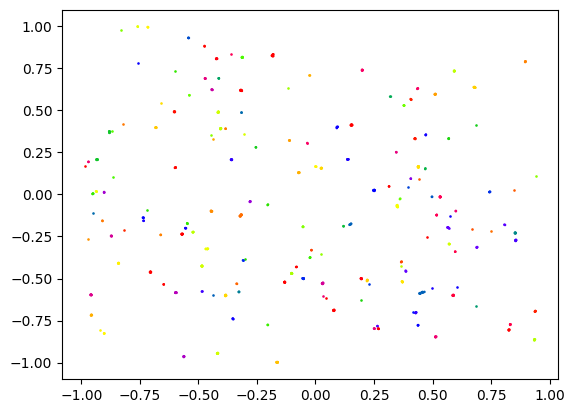

In [116]:
for colour, cluster in enumerate( MyClusters ) :
    if pts[colour] > 10:
        continue
    plt.scatter( cluster[:, 0], cluster[:, 1], s=3 , marker='.' , c=colour * np.ones_like(cluster[:, 0]) , 
                norm=mpl.colors.Normalize(vmin=0, vmax=len(MyClusters)), cmap="prism" )
plt.show()

In [27]:
for colour, cluster in enumerate( MyClusters ) :
    plt.scatter( cluster[:, 0], cluster[:, 1], s=0.1 , marker='.' , c=colour * np.ones_like(cluster[:,0]) , 
                norm=mpl.colors.Normalize(vmin=0, vmax=len(MyClusters)), cmap="prism" )
plt.show()

array([[1.],
       [1.]])

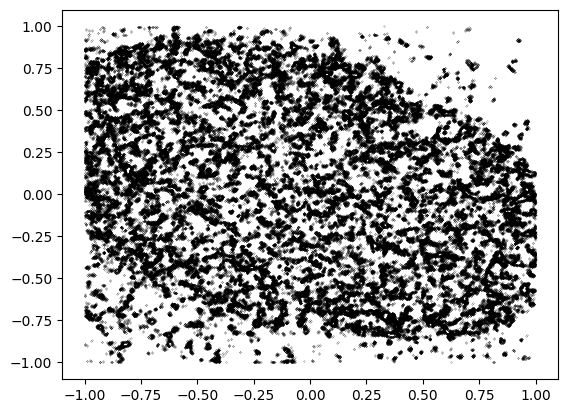

In [40]:
plt.scatter( MyBackground[:,0], MyBackground[:, 1], s=0.1 , marker='.' , c="black" )
plt.show()

In [42]:
np.var(MyClusters[0][:,0])

4.058576686390464e-07

In [43]:
np.var(MyClusters[0][:,1])

1.1023285325447e-06

In [48]:
20 * np.sqrt(np.sum(np.var(MyClusters[0], axis=0)))

0.024561646534251295

In [117]:
rad_rms = [20 * np.sqrt(np.sum(np.var(cluster, axis=0))) for cluster in MyClusters]
pts = [ cluster.shape[0] for cluster in MyClusters]

Text(0, 0.5, 'points in cluster')

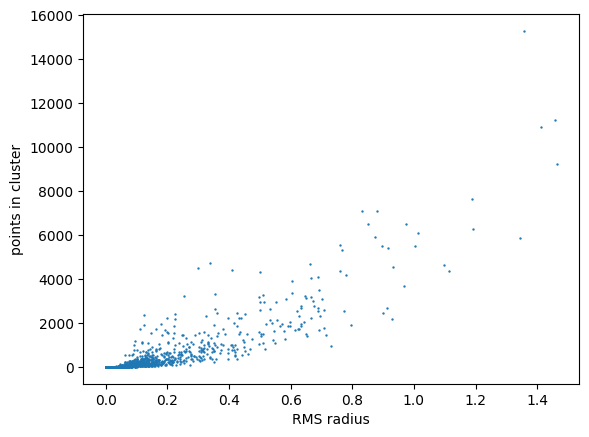

In [118]:
plt.scatter(rad_rms, pts, s=0.5)
plt.xlabel("RMS radius")
plt.ylabel("points in cluster")

Text(0, 0.5, 'points in cluster')

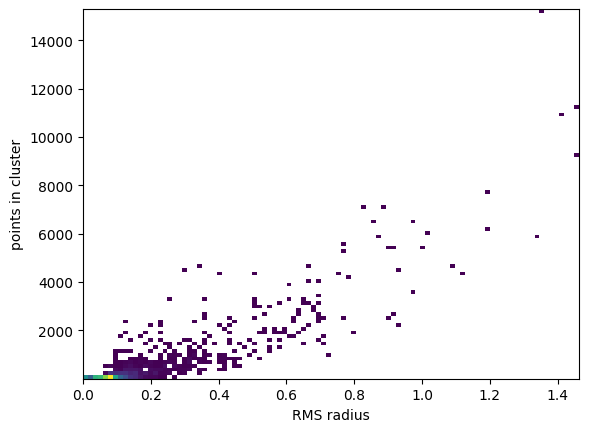

In [119]:
h = plt.hist2d(rad_rms, pts, bins=100, cmin=1)
plt.xlabel("RMS radius")
plt.ylabel("points in cluster")

In [76]:
import BayesianClustering as bc

In [78]:
dir(bc)

['Cluster',
 'Configuration',
 'Data',
 'DataIterator',
 'DataProxy',
 'DataPtrIterator',
 'Event',
 'EventProxy',
 'OneStopGetClusters',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

In [96]:
Configuration.FromVector( ['--cfg', '../config.txt', '-i', 
                           '/rds/general/project/easystorm/live/bayesian/1_un_red.csv'])
OneStopGetClusters( MyCallback )

Alpha: 20
Centre: x=9.75e-05, y=9.09e-05
Pb: 0.2
Zoom: 2e-05
Input file: /rds/general/project/easystorm/live/bayesian/1_un_red.csv
R-bins: 35 bins from 0 to 2e-07 in steps of 5.71429e-09
T-bins: 35 bins from 0 to 5e-07 in steps of 1.42857e-08
Sigma-integral: 5e-09 to 1e-07 in 100 steps
Reading File
Read 665253 points
  Completed in 6.178 seconds
Populating neighbourhood
  Completed in 9.997 seconds
Clusterize
  Completed in 2.339 seconds


In [98]:
len(MyClusters)

2067

In [106]:
np.sum((np.array(pts) == 1))

39

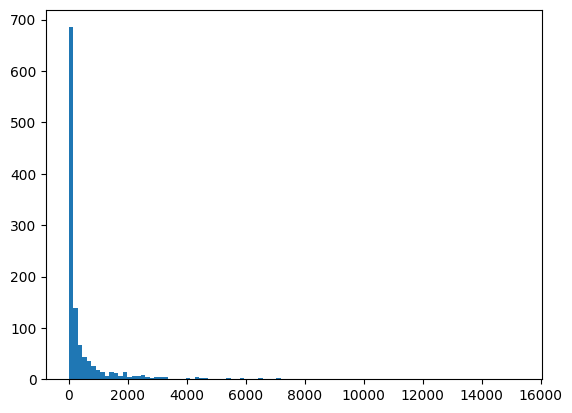

In [105]:
h = plt.hist(pts, bins=100)

In [110]:
len(pts)

1166